# 模拟退火算法

----

## 任务目的

熟悉和掌握模拟退火算法的核心原理和概念。

## 任务内容

编写模拟退火算法，实现二维数据点的最佳遍历路径。为了验证所设计算法的正确性，分别对三角函数和圆方程的最佳路径求解。  
<a href='#坐标初始化'>坐标初始化</a><br/>
<a href='#参数初始化'>参数初始化</a><br/>
<a href='#迭代计算'>迭代计算</a><br/>
<a href='#最佳路径绘制'>最佳路径绘制</a><br/>
<a href='#扩展实验'>扩展实验</a><br/>

## 任务原理

模拟退火算法来源于固体退火原理，是一种基于概率的算法，将固体加温至充分高，再让其徐徐冷却。加温时，固体内部粒子随温升变为无序状，内能增大，而徐徐冷却时粒子渐趋有序，在每个温度都达到平衡态，最后在常温时达到基态，内能减为最小。模拟退火其实也是一种贪婪算法，但是它的搜索过程引入了随机因素，以一定的概率来接受一个比当前解要差的解，因此有可能会跳出这个局部的最优解，达到全局的最优解。  
根据Metropolis准则，粒子在温度T时趋于平衡的概率为$exp(-ΔE/(kT))$，其中E为温度$T$时的内能，$ΔE$为其改变数,$k$为Boltzmann常数。Metropolis准则常表示为：  
<img src="../../image/MachineLearningAlgorithm/1-8.png" width="400" length="300"> 
总结起来就是：  
•若 $E(x_{new})<E(x_{old})$(即移动后得到更优解)，则总是接受该移动；  
•若$E(x_{new})>E(x_{old})$(即移动后的解比当前解要差)，则以一定的概率接受移动，而且这个概率随着时间推移逐渐降低（逐渐降低才能趋向稳定）。  


## 任务步骤

### 坐标初始化

1、添加如下所示的包和库文件，pdb库可用于代码的调试。Getdistmat用于计算不同坐标点之间的距离值。

```python
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
import pdb
import random
# 根据城市的坐标，得到邻接矩阵
def getdistmat(coordinates):
    num = coordinates.shape[0]
    distmat = np.zeros((52,52))
    for i in range(num):
        for j in range(i,num):
            distmat[i][j] = distmat[j][i]=np.linalg.norm(coordinates[i]-coordinates[j])  # i与j的欧氏距离
    return distmat
```

2、添加如下所示的52个城市的地理坐标。

```python
def initpara():
    alpha = 0.99
    t = (1,100)
    markovlen = 500
    return alpha,t,markovlen
# 52个城市的坐标
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],[945.0,685.0],[845.0,655.0],
[880.0,660.0],[25.0,230.0],[525.0,1000.0],[580.0,1175.0],[650.0,1130.0],
[1605.0,620.0],[1220.0,580.0],[1465.0,200.0],[1530.0,  5.0],[845.0,680.0],
[725.0,370.0],[145.0,665.0],[415.0,635.0],[510.0,875.0],[560.0,365.0],
[300.0,465.0],[520.0,585.0],[480.0,415.0],[835.0,625.0],[975.0,580.0],
[1215.0,245.0],[1320.0,315.0],[1250.0,400.0],[660.0,180.0],[410.0,250.0],
[420.0,555.0],[575.0,665.0],[1150.0,1160.0],[700.0,580.0],[685.0,595.0],
[685.0,610.0],[770.0,610.0],[795.0,645.0],[720.0,635.0],[760.0,650.0],
[475.0,960.0],[95.0,260.0],[875.0,920.0],[700.0,500.0],[555.0,815.0],
[830.0,485.0],[1170.0, 65.0],[830.0,610.0],[605.0,625.0],[595.0,360.0],
[1340.0,725.0],[1740.0,245.0]])
```

### 参数初始化

3、定义参数,包括当前路径的最优解和初始解、最大迭代次数、时间参数等。

```python
num = coordinates.shape[0]
distmat = getdistmat(coordinates)
# 初始解
solutionnew = np.arange(num)
valuenew = sys.float_info.max # np.max
solutioncurrent = solutionnew.copy()
valuecurrent = sys.float_info.max # np.max
solutionbest = solutionnew.copy()
valuebest = sys.float_info.max # np.max
alpha, t2, markovlen = initpara()
t = t2[1]
result = [] #记录迭代过程中的最优解
```

### 迭代计算

4、定义如下所示的迭代方法，随机选择当前路径的某一段路径替换，当该路径优于当前最佳路径时，更新最佳路径，否则随机的将该差值赋值当前路径。下次迭代路径被赋值为当前最佳路径，使得此迭代都从最佳路径开始寻找。设计了两种扰动方式。

```python
while t > t2[0]:
    for i in np.arange(markovlen): #迭代次数
        #下面的两交换和三角换是两种扰动方式，用于产生新解
        if np.random.rand() > 0.5:  # 两交换
            # np.random.rand()产生[0, 1)区间的均匀随机数
            while True:             #产生两个不同的随机数
                loc1 = np.int(np.ceil(np.random.rand()*(num-1)))
                loc2 = np.int(np.ceil(np.random.rand()*(num-1)))
                if loc1 != loc2:
                    break
            solutionnew[loc1],solutionnew[loc2] = solutionnew[loc2],solutionnew[loc1]
        else:                       #三交换
            while True:
                loc1 = np.int(np.ceil(np.random.rand()*(num-1)))
                loc2 = np.int(np.ceil(np.random.rand()*(num-1))) 
                loc3 = np.int(np.ceil(np.random.rand()*(num-1)))
                if((loc1 != loc2)&(loc2 != loc3)&(loc1 != loc3)):
                    break
            # 下面的三个判断语句使得loc1<loc2<loc3
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
            if loc2 > loc3:
                loc2,loc3 = loc3,loc2
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
            #下面的三行代码将[loc1,loc2)区间的数据插入到loc3之后
            tmplist = solutionnew[loc1:loc2].copy()
            solutionnew[loc1:loc3-loc2+1+loc1] = solutionnew[loc2:loc3+1].copy()
            solutionnew[loc3-loc2+1+loc1:loc3+1] = tmplist.copy()  
        valuenew = 0
```

5、以上为当前路径添加了扰动，计算添加扰动后路径的总距离，并保存最佳路径。

```python
        for j in range(num-1):          # 计算路径长度
            valuenew += distmat[solutionnew[j]][solutionnew[j+1]] 
        valuenew += distmat[solutionnew[51]][solutionnew[0]]  #加上 首尾两城市的距离
        if valuenew < valuecurrent:     # 接受该解
            #更新solutioncurrent 和solutionbest
            valuecurrent = valuenew
            solutioncurrent = solutionnew.copy()
            if valuenew < valuebest:    #更新最优解
                valuebest = valuenew
                solutionbest = solutionnew.copy()
                print('valuebest= ',valuebest)
        else:                           # 按一定的概率接受该解
            if np.random.rand() < np.exp(-(valuenew-valuecurrent)/t):
                valuecurrent = valuenew
                solutioncurrent = solutionnew.copy()
            else:
                solutionnew = solutioncurrent.copy()
    t = alpha*t
    result.append(valuebest)
    #print(t) #程序运行时间较长，打印t来监视程序进展速度
```

valuebest=  23438.23306156694
valuebest=  23199.231732728877
valuebest=  22901.89735759715
valuebest=  22846.016298735594
valuebest=  21606.847198573203
valuebest=  21492.96103155872
valuebest=  21442.60788051912
valuebest=  21386.072816429656
valuebest=  20706.711276543374
valuebest=  20636.9583275998
valuebest=  20491.943571415006
valuebest=  20478.33394196495
valuebest=  20431.534927085202
valuebest=  20405.60044359186
valuebest=  20137.85110199325
valuebest=  20085.46701638588
valuebest=  19869.041080733812
valuebest=  19846.58667999258
valuebest=  19569.628520080725
valuebest=  19469.527979617258
valuebest=  19442.933226651992
valuebest=  19378.817431585452
valuebest=  18836.95649119945
valuebest=  17883.578681426032
valuebest=  17086.47704500495
valuebest=  17001.9068238072
valuebest=  16905.779706330723
valuebest=  16853.435107329435
valuebest=  16641.108419678192
valuebest=  16625.225164017884
valuebest=  16562.181238840585
valuebest=  16480.677778303245
valuebest=  15712.65392

## 最佳路径绘制

6、绘制最佳路径图解，如下所示。

```python
plt.figure(1,figsize=(10,4) )
plt.subplot(1,2,1)
plt.plot(np.array(result))
plt.title('Simulated Annealing Optimization')
plt.xlabel('t')
plt.ylabel("bestvalue")
plt.subplot(1,2,2)
plt.plot(coordinates[:,0],coordinates[:,1],'r.',marker=u'$\cdot$')
plt.title('Simulated Annealing Optimization')
plt.xlabel('x')
plt.ylabel('y')
for i in range(num-1):
    m, n = solutionbest[i], solutionbest[i+1]
    #print(m,n)
    plt.plot([coordinates[m][0],coordinates[n][0]],  [coordinates[m][1], 
coordinates[n][1]],'k')
plt.show()
print(solutionbest)
```

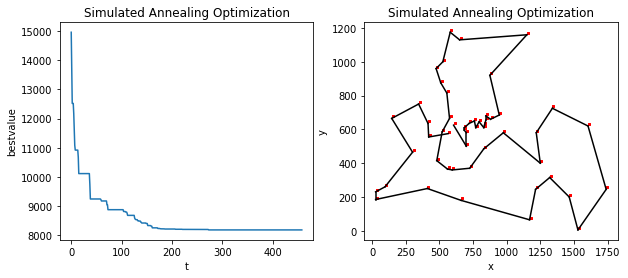

[ 0 30 17  2 16 20 41  6  1 29 28 46 25 26 12 13 51 10 50 11 27 24 45 15
 49 19 22 21 31 44 18 40  7  8  9 32 42  3  5 14  4 23 47 37 36 39 38 35
 34 33 43 48]


### 扩展实验

7、为了验证所设计模拟退火算法的性能，设计三角函数如下所示，并随机扰乱次序。所设计的模拟退火算法得到结果和理论值相同。  
<font color=#ff000>注意：用以下代码段替换上文中相应的代码段，并再次运行。 </font>

```python
x = [i for i in range(10)]
y = np.zeros(len(x))

coordinates = np.zeros([len(x),2])

for i in range(len(x)):
    y[i] = math.cos(2*math.pi/10*x[i])
    coordinates[i] = [x[i],y[i]]
    
np.random.shuffle(coordinates)
```

8、当将以上的三角函数离散化为52个值时，得到的新的输出。可见并未得到最优解，但已经和最优解接近。  
<font color=#ff000>注意：用以下代码段替换上文中相应的代码段，并再次运行。 </font>

```python
x = [i for i in range(52)]
y = np.zeros(len(x))

coordinates = np.zeros([len(x),2])

for i in range(len(x)):
    y[i] = math.cos(2*math.pi/52*x[i])
    coordinates[i] = [x[i],y[i]]
    
np.random.shuffle(coordinates)
```

9、设计如下所示的圆方程路径，得到新的的解，除了局部值不正确，总体输出值仍按规律分布。  
<font color=#ff000>注意：用以下代码段替换上文中相应的代码段，并再次运行。 </font>

```python
angles_circle = [i*2*math.pi/52 for i in range(0,52)]                 #i先转换成double
#angles_circle = [i/np.pi for i in np.arange(0,360)]             # <=> 
# angles_circle = [i/180*pi for i in np.arange(0,360)]    X
i = 0
for angles in angles_circle:
    x = 10*math.cos(angles)
    y = 10*math.sin(angles)
    coordinates[i] = [x,y]
    i=i+1
```